## 우루사 VS 고덱스 분석하기

* 약품코드 찾기

http://www.hira.or.kr/rf/medicine/getHistoryList.do?pgmid=HIRAA030035020000

http://medinavi.co.kr/search_medicine.asp?keyword1=&keyword2=%EC%9A%B0%EB%A3%A8%EC%82%AC&keyword3=%EB%8C%80%EC%9B%85%EC%A0%9C%EC%95%BD

```
우루사정100밀리그램 246501ATB
우루사정200밀리그램 246502ATB
우루사정300밀리그램 246506ATB
우루사100mg연질캅셀 246501ACS
우루사캅셀200mg 246502ACH
우루사캡슐250밀리그램 246503ACH
고덱스캡슐 427800ACH
```


<img src="https://i.imgur.com/4dEl5Dl.jpg">

출처 : http://www.docdocdoc.co.kr/news/articleView.html?idxno=1053667

## 라이브러리로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 시각화를 위한 한글폰트 설정

In [2]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 데이터셋 로드

In [7]:
# ursa_2011_2018.csv 로 저장한 데이터를 불러옵니다.
df = pd.read_csv('data/medicine_2011_2019.csv', encoding="utf-8")
df.shape

(519525, 15)

## 데이터 미리보기

In [10]:
df.head(3)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2011,263152,301,3,1,12,41,20111109,246501ATB,1.0,3,3,111.0,999,20151220
1,2011,142227,310,4,1,14,41,20111125,246501ATB,1.0,3,7,111.0,2331,20151220
2,2011,253952,1013,1,2,9,46,20111203,246502ATB,1.0,3,14,165.0,6930,20151220


In [9]:
df.tail(3)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
519522,2019,999868,108375768,3,2,12,41,20190408,427800ACH,1.0,1,50,402.0,20100,20201222
519523,2019,999868,100117993,3,2,12,41,20191115,427800ACH,1.0,1,60,388.0,23280,20201222
519524,2019,999868,104284780,3,2,12,41,20190530,427800ACH,1.0,1,60,402.0,24120,20201222


## 데이터 전처리

### 주성분코드로 약품명 찾기
* 우루사정100밀리그램 246501ATB
* 우루사정200밀리그램 246502ATB
* 우루사정300밀리그램 246506ATB
* 우루사100mg연질캅셀 246501ACS
* 우루사캅셀200mg 246502ACH
* 우루사캡슐250밀리그램 246503ACH
* 고덱스캡슐 427800ACH

In [19]:
code = """우루사정100밀리그램 246501ATB
우루사정200밀리그램 246502ATB
우루사정300밀리그램 246506ATB
우루사100mg연질캅셀 246501ACS
우루사캅셀200mg 246502ACH
우루사캡슐250밀리그램 246503ACH
고덱스캡슐 427800ACH"""
code_split = code.split("\n")
code_split

['우루사정100밀리그램 246501ATB',
 '우루사정200밀리그램 246502ATB',
 '우루사정300밀리그램 246506ATB',
 '우루사100mg연질캅셀 246501ACS',
 '우루사캅셀200mg 246502ACH',
 '우루사캡슐250밀리그램 246503ACH',
 '고덱스캡슐 427800ACH']

In [21]:
code_key_val = {}
for cname in code_split:
    key = cname.split()[-1] #code가 key값이 되고 value가 이름이 되게  한다.
    val = cname.split()[0]
    code_key_val[key] = val
    
print(code_key_val)   #split을 두번하여 진행함

{'246501ATB': '우루사정100밀리그램', '246502ATB': '우루사정200밀리그램', '246506ATB': '우루사정300밀리그램', '246501ACS': '우루사100mg연질캅셀', '246502ACH': '우루사캅셀200mg', '246503ACH': '우루사캡슐250밀리그램', '427800ACH': '고덱스캡슐'}


In [ ]:
# 위에서 만든 텍스트로 주성분코드와 약품명을 매치하기 위해 딕셔너리를 만듭니다.
# code_key_val 이라는 변수에 딕셔너리 형태로 값을 넣어줍니다.
code_key_val = {}
print(code_key_val)

In [25]:
# 딕셔너리를 매핑합니다.
# apply는 series와 df모두 쓸수 있다. map은 Series에서만 사용가능
df["약품일반성분명"] = df["약품일반성분명코드"].map(code_key_val)
df[["약품일반성분명코드","약품일반성분명"]].head()

,약품일반성분명코드,약품일반성분명
0,246501ATB,우루사정100밀리그램
1,246501ATB,우루사정100밀리그램
2,246502ATB,우루사정200밀리그램
3,246502ATB,우루사정200밀리그램
4,246501ATB,우루사정100밀리그램


### 우루사와 고덱스 구분하기

In [26]:
# 우루사는 "약품일반성분명코드"가 여러 개 입니다.
# 고덱스코드를 통해 우루사인지 아닌지 True, False로 boolean 값을 갖는 컬럼을 생성합니다.
# 컬럼명은 "우루사"로 합니다.
df["우루사"] = df["약품일반성분명코드"] != "427800ACH"
df[["약품일반성분명코드","약품일반성분명","우루사"]].head()

,약품일반성분명코드,약품일반성분명,우루사
0,246501ATB,우루사정100밀리그램,True
1,246501ATB,우루사정100밀리그램,True
2,246502ATB,우루사정200밀리그램,True
3,246502ATB,우루사정200밀리그램,True
4,246501ATB,우루사정100밀리그램,True


In [27]:
df["우루사"].value_counts(normalize=True)*100

True     73.454983
False    26.545017
Name: 우루사, dtype: float64

In [29]:
df.groupby("우루사")["금액"].sum()

우루사
False    5400631430
True     4502523836
Name: 금액, dtype: int64

In [30]:
df.groupby("우루사")["금액"].agg(["mean","sum"])

,mean,sum
우루사,,
False,39161.117774,5400631430
True,11798.541040,4502523836


In [34]:
#우르사와 기준년도 

year_price = df.groupby(["기준년도","우루사"])["금액"].agg(
    ["mean","sum"]).unstack().round(0).astype(int)
year_price.style.background_gradient()

### 결측치 보기

In [35]:
# 결측치가 있는지 봅니다.
df.isnull().sum()

기준년도           0
가입자 일련번호       0
처방내역일련번호       0
일련번호           0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
요양개시일자         0
약품일반성분명코드      0
1회 투약량         0
1일투약량          0
총투여일수          0
단가             0
금액             0
데이터 공개일자       0
우루사            0
약품일반성분명        0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519525 entries, 0 to 519524
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준년도         519525 non-null  int64  
 1   가입자 일련번호     519525 non-null  int64  
 2   처방내역일련번호     519525 non-null  int64  
 3   일련번호         519525 non-null  int64  
 4   성별코드         519525 non-null  int64  
 5   연령대코드(5세단위)  519525 non-null  int64  
 6   시도코드         519525 non-null  int64  
 7   요양개시일자       519525 non-null  int64  
 8   약품일반성분명코드    519525 non-null  object 
 9   1회 투약량       519525 non-null  float64
 10  1일투약량        519525 non-null  int64  
 11  총투여일수        519525 non-null  int64  
 12  단가           519525 non-null  float64
 13  금액           519525 non-null  int64  
 14  데이터 공개일자     519525 non-null  int64  
 15  우루사          519525 non-null  bool   
 16  약품일반성분명      519525 non-null  object 
dtypes: bool(1), float64(2), int64(12), object(2)
memory usage: 63.9+ MB

### 요양개시일자로 정렬하기

In [42]:
# "요양개시일자", "가입자일련번호", "처방내역일련번호", "일련번호" 로 정렬합니다.
df.sort_values(["요양개시일자", "가입자 일련번호", "처방내역일련번호", "일련번호"])
df.head(3)

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,우루사,약품일반성분명
0,2011,263152,301,3,1,12,41,20111109,246501ATB,1.0,3,3,111.0,999,20151220,True,우루사정100밀리그램
1,2011,142227,310,4,1,14,41,20111125,246501ATB,1.0,3,7,111.0,2331,20151220,True,우루사정100밀리그램
2,2011,253952,1013,1,2,9,46,20111203,246502ATB,1.0,3,14,165.0,6930,20151220,True,우루사정200밀리그램


- "우루사"를 처장받는 사람들이 어떤 약을 같이 처방받았는지도 알 수 있다.
- '일련번호'는 처장자가 몇번째 처장받은 것인질르 나타낸다.

### 날짜 다루기
* 연, 월, 일, 요일 추출하기

In [51]:
# "요양개시일자"의 데이터 타입을 봅니다.
df["요양개시일자"].head(1)

0    20111109
Name: 요양개시일자, dtype: int64

In [55]:
# "요양개시일자"를 datetime 형태로 변환하기 위해서 astype 을 사용해 문자형태로 변환합니다.
# 타입을 변경하고 다시 같은 컬럼에 데이터를 담아주어야 변경된 내용이 반영됩니다.
df["요양개시일자"] = pd.to_datetime(df["요양개시일자"].astype(str))
# 데이트타임 형식으로 변형을 할때 숫자로 변환이 된다면 .astype(str)를 붙이면 
# 원하는 형태로 변형가능 하다.

In [56]:
# "요양개시일자"에서 연, 월, 일을 추출합니다.
df["연"] = df["요양개시일자"].dt.year
df["월"] = df["요양개시일자"].dt.month
df["일"] = df["요양개시일자"].dt.day

In [57]:
# "요양개시일자"에서 "요일"과 "영문요일"을 추출합니다.
df["요일"]=df["요양개시일자"].dt.dayofweek
df["영문요일"]=df["요양개시일자"].dt.day_name()

In [62]:
# 요일을 한글요일로 변경합니다.
weekday = "월화수목금토일"
# df["요일명"]
df["요일명"]=df["요일"].map(lambda x:weekday[x])  #자기 자신을 반환한다.
# weekday에 x를 넣어주면은 요일을 요일명으로 불러 올 수 있다.
df[["요일","영문요일","요일명"]].head()

,요일,영문요일,요일명
0,2,Wednesday,수
1,4,Friday,금
2,5,Saturday,토
3,0,Monday,월
4,0,Monday,월


### 컬럼 디스플레이 옵션 변경하기

In [64]:
# 컬럼이 많이 늘어나서 한번에 모든 컬럼이 보이지 않습니다.
# max_columns 의 수를 지정합니다.
pd.options.display.max_columns = None
#숫자를 넣으면 숫자 만큼 보이고 None 이라고 지정하면 생략하지 않고 전부 가져오게 된다.

In [65]:
# sample 을 통해 모든 컬럼이 보이는지 확인합니다.
df.sample()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,우루사,약품일반성분명,연,월,일,요일,영문요일,요일명
88313,2013,434579,2449665,2,2,10,45,2013-04-05,246502ATB,1.0,2,30,202.0,12120,20151220,True,우루사정200밀리그램,2013,4,5,4,Friday,금


### 시도코드를 시도명으로 변환하기
* 시도코드를 통해 시도명을 만듭니다.

In [67]:
city = """11 서울특별시
42 강원도
26 부산광역시
43 충청북도
27 대구광역시
44 충청남도
28 인천광역시
45 전라북도
29 광주광역시
46 전라남도
30 대전광역시
47 경상북도
31 울산광역시
48 경상남도
36 세종특별자치시
49 제주특별자치도
41 경기도"""
city_list = city.split("\n")
city_list

['11 서울특별시',
 '42 강원도',
 '26 부산광역시',
 '43 충청북도',
 '27 대구광역시',
 '44 충청남도',
 '28 인천광역시',
 '45 전라북도',
 '29 광주광역시',
 '46 전라남도',
 '30 대전광역시',
 '47 경상북도',
 '31 울산광역시',
 '48 경상남도',
 '36 세종특별자치시',
 '49 제주특별자치도',
 '41 경기도']

In [70]:
# city 변수에 담긴 코드값과 코드명을 딕셔너리 형태로 만들기
city_name={}
for city_info in city_list:
    city_split=city_info.split()
    city_key=int(city_split[0])
    city_val = city_split[-1]
    city_name[city_key]=city_val
    
print(city_name)

{11: '서울특별시', 42: '강원도', 26: '부산광역시', 43: '충청북도', 27: '대구광역시', 44: '충청남도', 28: '인천광역시', 45: '전라북도', 29: '광주광역시', 46: '전라남도', 30: '대전광역시', 47: '경상북도', 31: '울산광역시', 48: '경상남도', 36: '세종특별자치시', 49: '제주특별자치도', 41: '경기도'}


- 위 내용을 실행하면 코드 부분이 문자로 되어있다.

In [72]:
# 시도명 컬럼 만들기
df["시도명"] = df["시도코드"].map(city_name)
df[["시도명","시도코드"]].head()
# map() 에 대한 부분 follow_up하기

,시도명,시도코드
0,경기도,41
1,경기도,41
2,전라남도,46
3,전라남도,46
4,경상남도,48


### '연령대코드(5세단위)' 를 연령대로 변환하기

In [73]:
# '연령대코드(5세단위)' 를 연령대로 나타내기
age_code = """1 00~04세 
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
11 50~54세
10 45~49세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""

In [78]:
age_list = age_code.split("\n")
age_dict = {}
for age_pair in age_list:
    age_split = age_pair.split(" ")
    key = age_split[0]
    key = int(key)
    val = age_split[1]
    age_dict[key] = val
age_dict

{1: '00~04세',
 2: '05~09세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 11: '50~54세',
 10: '45~49세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [79]:
df["연령대"] = df["연령대코드(5세단위)"].map(age_dict)

### 특정 약품일반성분명코드로 서브셋 만들기
* isin 사용하기

In [81]:
# 여러 개를 찾을 때 "246506ATB", "246503ACH" 약품만을 찾아봅니다.
df_sample = df[df["약품일반성분명코드"].isin(["246506ATB", "246503ACH" ])]
df_sample.shape

(3963, 25)

## 파일로 저장하기

In [83]:
# "sample.csv" 파일로 저장하기
df_sample.to_csv("sample.csv", index = False, encoding = "cp949")

In [84]:
# 저장된 파일 읽어와서 확인하기
pd.read_csv("sample.csv", encoding = "cp949").head()


,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,우루사,약품일반성분명,연,월,일,요일,영문요일,요일명,시도명,연령대
0,2011,88000,2970,2,1,13,27,2011-12-23,246506ATB,1.0,1,90,327.0,29430,20151220,True,우루사정300밀리그램,2011,12,23,4,Friday,금,대구광역시,60~64세
1,2011,739925,2972,7,1,13,27,2011-12-22,246506ATB,1.0,1,36,327.0,11772,20151220,True,우루사정300밀리그램,2011,12,22,3,Thursday,목,대구광역시,60~64세
2,2011,319400,2976,3,1,15,27,2011-12-06,246506ATB,1.0,1,21,327.0,6867,20151220,True,우루사정300밀리그램,2011,12,6,1,Tuesday,화,대구광역시,70~74세
3,2011,441187,16710,1,2,15,46,2011-12-13,246503ACH,1.0,2,28,297.0,16632,20151220,True,우루사캡슐250밀리그램,2011,12,13,1,Tuesday,화,전라남도,70~74세
4,2011,88000,59321,1,1,13,27,2011-02-23,246506ATB,1.0,1,30,330.0,9900,20151220,True,우루사정300밀리그램,2011,2,23,2,Wednesday,수,대구광역시,60~64세


## 연도별 처방 수

In [86]:
# 범주형 vs 범주형 값을 구할 때 crosstab 을 사용합니다.
# 연도별로 우루사와 고덱스의 처방수를 구합니다.
pd.crosstab(df["연"], df["우루사"])

우루사,False,True
연,,
2011,6939,28773
2012,8130,31122
2013,8507,34153
2014,8576,33027
2015,10886,35125
2016,16233,47456
2017,21078,52073
2018,25829,55564
2019,31730,64324


In [90]:
# 위에서 구한 값을 pivot_table 로 똑같이 구해봅니다.
# 연도별로 우루사와 고덱스의 처방수를 구합니다.
# aggfunc 에 len 을 사용하면 갯수를 카운트 합니다.
# "count"를 사용해도 됩니다.
year_ursa = pd.pivot_table(data=df, index=["연", "우루사"],
             values = "가입자 일련번호", aggfunc = "count")
year_ursa.columns  =["처방수"]
year_ursa = year_ursa.reset_index()
year_ursa

,연,우루사,처방수
0,2011,False,6939
1,2011,True,28773
2,2012,False,8130
3,2012,True,31122
4,2013,False,8507
5,2013,True,34153
6,2014,False,8576
7,2014,True,33027
8,2015,False,10886
9,2015,True,35125


<AxesSubplot:xlabel='연', ylabel='처방수'>

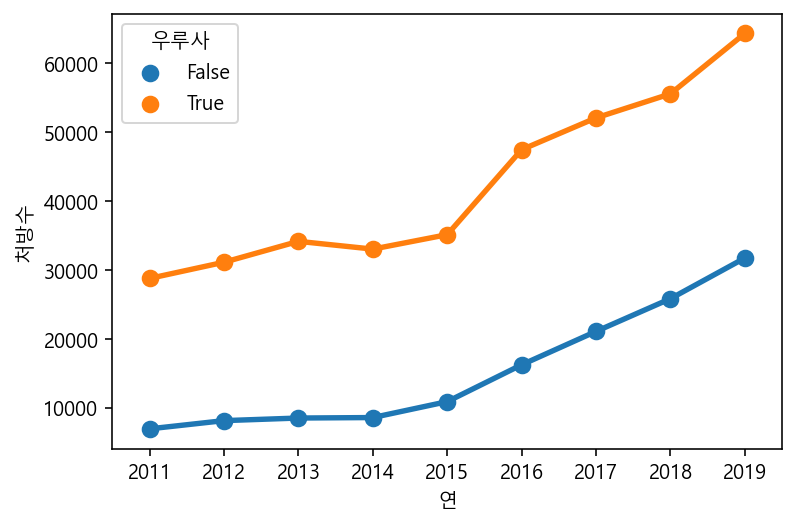

In [91]:
# 위에서 구한 값을 pointplot으로 시각화 합니다.
sns.pointplot(data=year_ursa, x="연", y="처방수", hue="우루사" )

<AxesSubplot:xlabel='연', ylabel='count'>

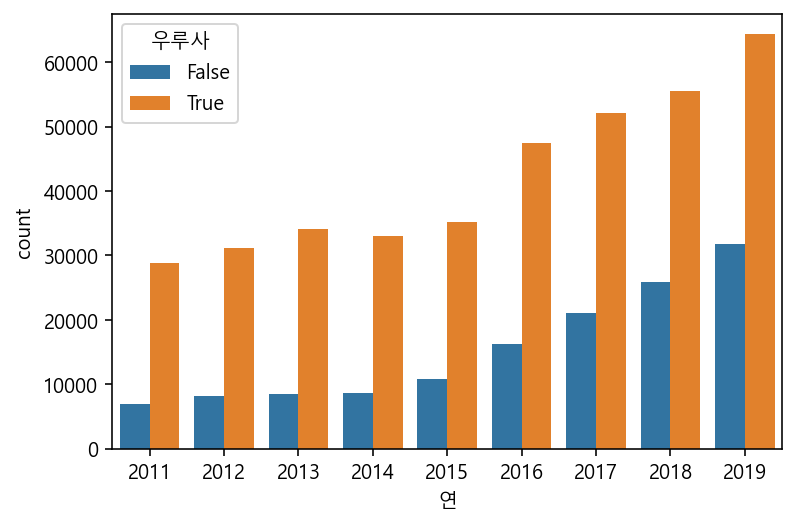

In [93]:
# 위에서 구한 값을 countplot으로 시각화 합니다.
sns.countplot(data = df, x="연", hue="우루사")

## 연도별 처방 금액

In [ ]:
# 연도별 처방금액의 합계를 구합니다.


In [ ]:
# 위에서 구한 값을 시각화 합니다.


In [ ]:
# 우루사 vs 고덱스의 연도별 처방 금액을 구합니다.


In [ ]:
# 위에서 구한 값을 pointplot으로 시각화 합니다.


### 시도별 처방수와 금액 구하기

In [ ]:
# pivot_table 로 행에 연도, 컬럼에 시도명이 오도록 처방수와 처방금액을 구합니다.



In [ ]:
# background_gradient로 결과 표현하기



### 시도별 서브플롯 그리기

In [ ]:
# catplot을 통해 연도별, 금액을 시도명으로 서브플롯을 그립니다.
# 이 때, 우루사 여부에 따라 다른색상으로 pointplot을 그립니다.


## 연도, 월별 처방수와 금액

In [ ]:
# 행에 월, 컬럼에 연도가 오도록 위에서 pivot_table로 구했던 값을 groupby 로 똑같이 구해봅니다.



* 스타일 적용 : https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [ ]:
# background_gradient 스타일을 적용해서 값의 많고 적음에 따라 색상으로 구분되게 그립니다.



In [ ]:
# 그룹화된 결과에서 처방수만 가져오기
# 수치의 높고 낮음을 색상으로 표현하기 위해 background_gradient 를 사용합니다.



In [ ]:
# 그룹화된 결과에서 처방금액 합계만 보기
# bar 를 통해 셀안에 그래프로 표현하기


In [ ]:
# 위에서 만든 변수에서  group["count"] 값만 가져와서 year_month_count 변수에 담습니다.



In [ ]:
# year_month_count 변수에 담긴 값을 heatmap 으로 그립니다.
# cmap 을 YlGn 으로 표시합니다.



## 연, 월별 처방 수와 합계 금액
* 연, 월별 처방 수와 합계금액을 groupby 로 구해보세요.

In [ ]:
# 위에서 구한 값은 index와 columns에 연 또는 월이 들어갑니다.
# 같은 값을 갖는 데이터를 index 에 연, 월이 모두 들어가도록 groupby 로 연산을 해봅니다.
# index에 연, 월이 모두 들어갈 때 위의 형태의 데이터프레임과 다루는 차이를 알아봅니다.
# 금액 값에 대해 처방수와 금액의 합계를 구합니다.



In [ ]:
# 연,월별 처방수 시각화



In [ ]:
# pointplot으로 월별 처방금액 합계를 그리고 "연"별로 다른 색상으로 표현합니다.


In [ ]:
# pointplot으로 "약품일반성분명"에 따라 평균 처방 금액 보기



In [ ]:
# pointplot으로 월별 "약품일반성분명"에 따른 처방금액 합계



In [ ]:
# pointplot으로 월별 "우루사" 여부에 따른 처방금액 합계



In [ ]:
# pointplot으로 월별 처방수를 우루사 여부에 따라 그리기


## 요일별 처방수

In [ ]:
# countplot 을 통해 요일별 우루사 여부에 따른 처방수를 시각화 합니다.
# 이때, data에 df.sort_values("요일") 로 
# 요일별로 정렬된 데이터를 넣어주면 요일별로 정렬이 가능합니다.



In [ ]:
# "약품일반성분명코드" 별로 요일별 처방수를 시각화



### 연령대코드 vs 성별코드
* countplot 으로 그리기

### 월 vs 성별코드

## 우루사 vs 고덱스

### 성별코드별 처방수
* countplot 으로 그리기

In [ ]:
# 약품일반성분명



In [ ]:
# 우루사 여부



In [ ]:
# 연도별



In [ ]:
# 월별 약품일반성분명



In [ ]:
# 월별 우루사 여부에 따라 countplot을 그리기



In [ ]:
# 월별 성별코드에 따라 countplot 그리기



### 기간별 단가와 금액

In [ ]:
# 연도별 평균단가를 "성별코드"에 따라 다른 색상으로 그립니다.



In [ ]:
# 연도별 평균금액을 "성별코드"에 따라 다른 색상으로 그립니다.



In [ ]:
# 연도별 "1회투약량"을 "우루사"여부에 따라 다른 색상으로 그립니다.



In [ ]:
# 연도별 단가를 "우루사" 여부에 따라 다른 색상으로 그립니다.



In [ ]:
# 월별 평균 처방 금액을 성별코드에 따라 다른 색상으로 그립니다.



In [ ]:
# 월별 평균 처방 금액을 우루사 여부에 따라 다른 색상으로 그립니다.



### 성별코드별

In [ ]:
# 연도별 평균 총투여일수



In [ ]:
# 연도별 평균 1일투약량



In [ ]:
# 연도별 평균 연령대코드



### 연령대코드(5세단위)

In [ ]:
# 총투여일수와 성별코드



In [ ]:
# 금액과 성별코드


In [ ]:
# 1일투약량과 성별코드



## 과제

* 약품 하나를 정해서 기간별 분석을 해본다든지 특정 시기에 주로 처방받은 약품, 금액이 높은 약품 등의 자율주제로 분석을 해보세요.